Работа с датасетом по предиктивной аналитике на заводе SEZEM

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
data = pd.read_csv("IIoT_data.csv", sep=";", encoding="utf-8")

In [3]:
data[:3]

,Source,TagName,Alias,Location,DateTime,State,Value,Unit,Quality,QualityStatus
0,Test_IIoT,WeldindStation1_Robot1_PlusWire_value,"Temperature Welding station 1, Robot plus wire",SEZEM,05.11.2020 21:48:28.265,NaN,"29,298",None,192,Good
1,Test_IIoT,WeldindStation1_Robot1_PlusWire_value,"Temperature Welding station 1, Robot plus wire",SEZEM,19.11.2020 12:55:44.509,NaN,"28,6",None,192,Good
2,Test_IIoT,WeldindStation1_Robot1_PlusWire_value,"Temperature Welding station 1, Robot plus wire",SEZEM,19.11.2020 13:41:30.714,NaN,"27,3",None,192,Good


In [4]:
data = data.drop(["Source", "Alias", "Location", "State", "Unit", "Quality", "QualityStatus"], 1)
data[:3]

,TagName,DateTime,Value
0,WeldindStation1_Robot1_PlusWire_value,05.11.2020 21:48:28.265,"29,298"
1,WeldindStation1_Robot1_PlusWire_value,19.11.2020 12:55:44.509,"28,6"
2,WeldindStation1_Robot1_PlusWire_value,19.11.2020 13:41:30.714,"27,3"


In [5]:
data["TagName"] = data["TagName"].apply(lambda x: x.replace("Weldind", ""))
data["TagName"] = data["TagName"].apply(lambda x: x.replace("_value", ""))

data["Value"] = data["Value"].apply(lambda x: x.replace(",", "."))
data["Value"] = pd.to_numeric(data["Value"])

data["DateTime"] = pd.to_datetime(data["DateTime"], dayfirst=True)
data.sort_values(by=["DateTime"])
data[:3]

,TagName,DateTime,Value
0,Station1_Robot1_PlusWire,2020-11-05 21:48:28.265,29.298
1,Station1_Robot1_PlusWire,2020-11-19 12:55:44.509,28.600
2,Station1_Robot1_PlusWire,2020-11-19 13:41:30.714,27.300


In [6]:
test = data.groupby("TagName")

robot1 = []
robot2 = []

for n, g in test:
    print(n)
    if n in ["Station1_Robot1_PlusWire", "Station2_Inverter1_MinusWire", "Station2_Inverter1_PlusWire"]:
        robot1.append(g)
    elif n == "Station2_Robot1Robot2_MinusWire":
        robot1.append(g)
        robot2.append(g)
    else:
        robot2.append(g)

Station1_Robot1_PlusWire
Station2_Inverter1_MinusWire
Station2_Inverter1_PlusWire
Station2_Inverter2_MinusWire
Station2_Inverter2_PlusWire
Station2_Robot1Robot2_MinusWire
Station2_Robot2_PlusWire


In [7]:
r1 = pd.concat(robot1)
r1_pivoted = r1.pivot(index="DateTime", columns="TagName", values="Value")
r1_pivoted = r1_pivoted[["Station1_Robot1_PlusWire", "Station2_Inverter1_PlusWire", "Station2_Inverter1_MinusWire", "Station2_Robot1Robot2_MinusWire"]]
r1_pivoted.to_excel(f"./data/r1.xlsx")

In [8]:
r2 = pd.concat(robot2)
r2_pivoted = r2.pivot(index="DateTime", columns="TagName", values="Value")
r2_pivoted = r2_pivoted[["Station2_Robot2_PlusWire", "Station2_Inverter2_PlusWire", "Station2_Inverter2_MinusWire", "Station2_Robot1Robot2_MinusWire"]]
r2_pivoted.to_excel(f"./data/r2.xlsx")

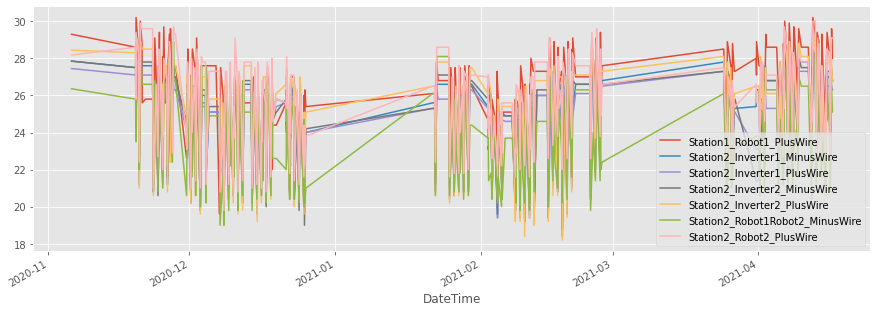

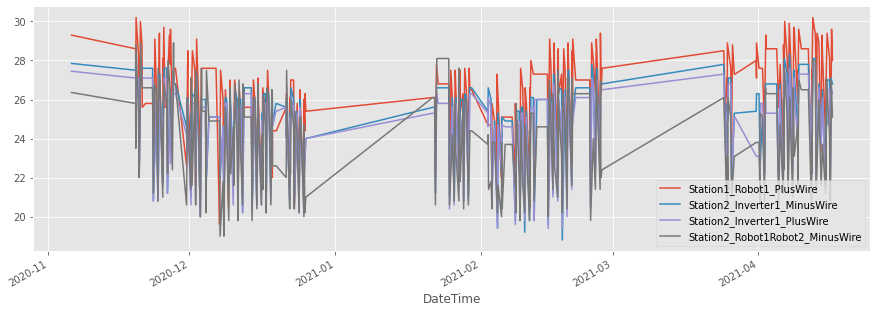

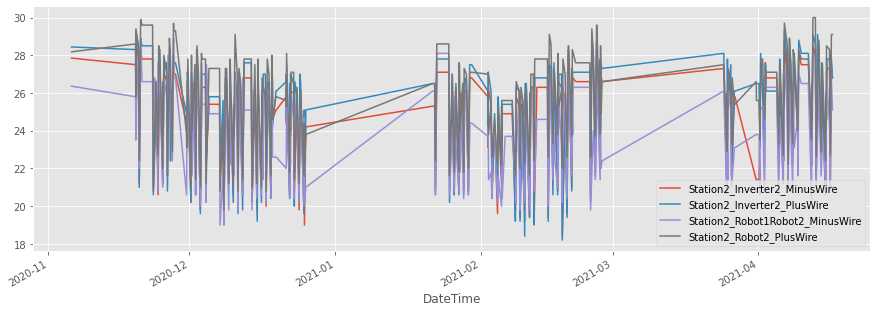

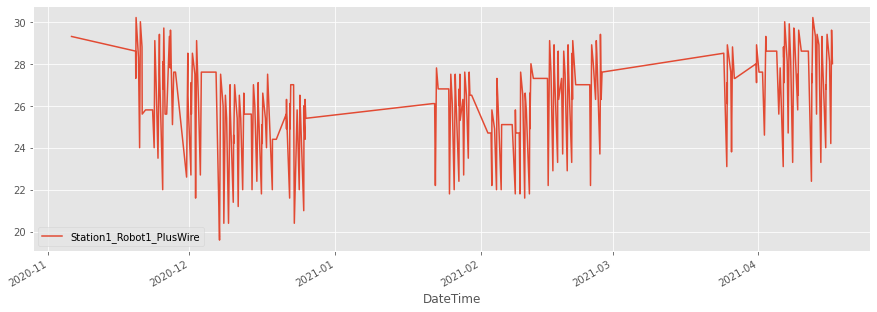

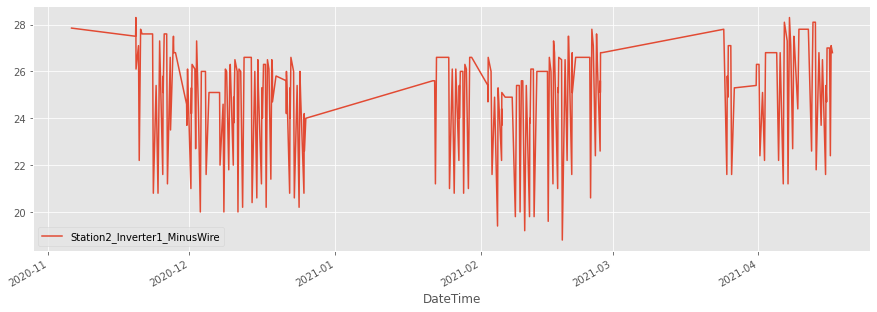

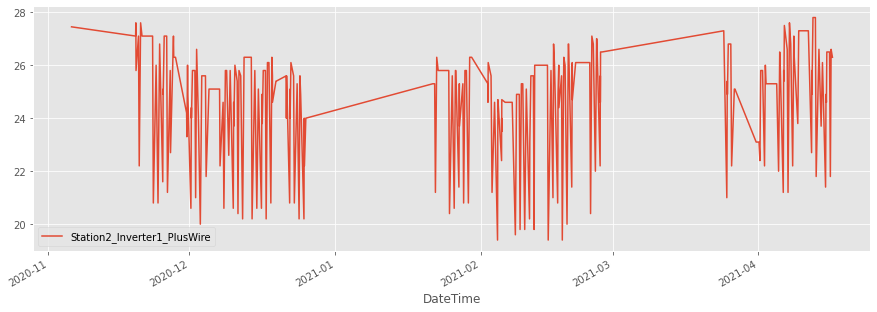

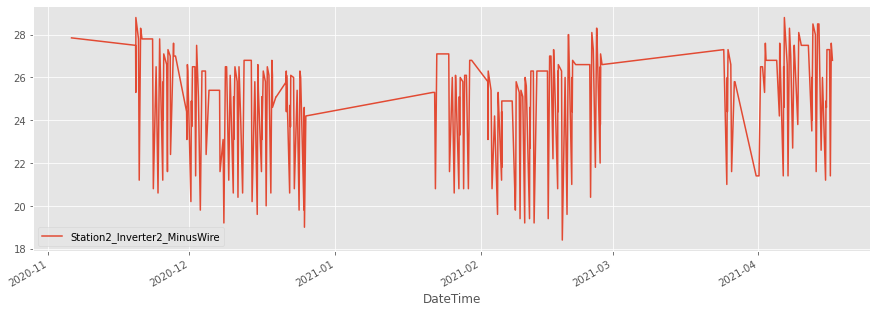

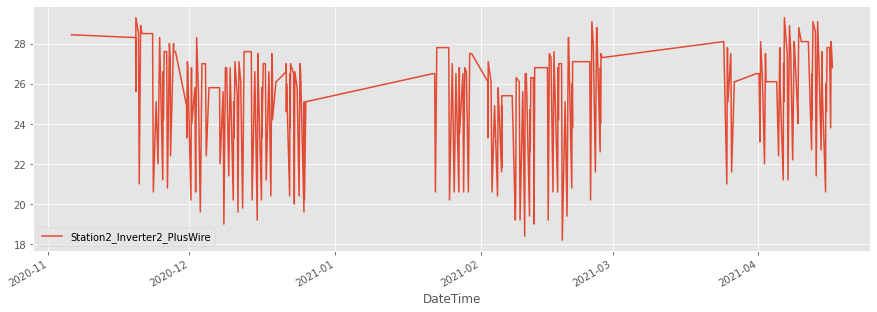

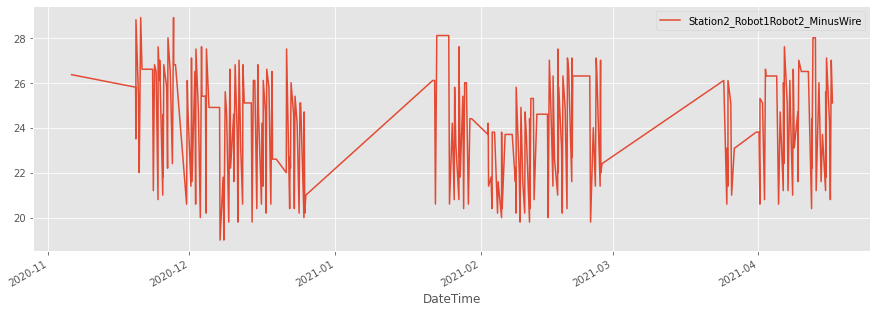

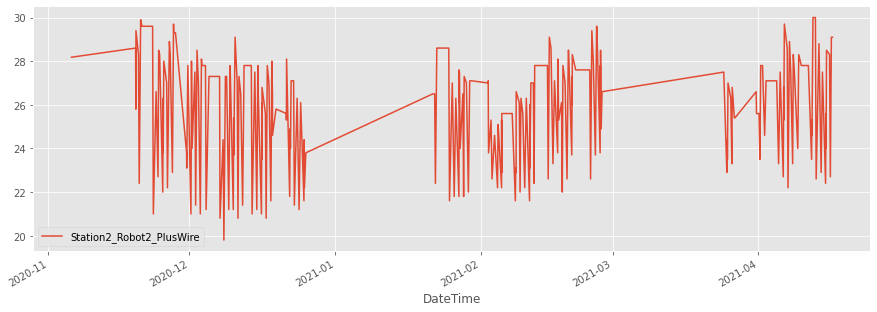

In [9]:
grouped = data.groupby(["TagName"])

fig, ax = plt.subplots(figsize=(15,5))
fig1, ax1 = plt.subplots(figsize=(15,5))
fig2, ax2 = plt.subplots(figsize=(15,5))

for name, group in grouped:
    plot_ = group.plot(x="DateTime", y="Value", label=name)

    fig_ = plot_.get_figure()
    fig_.savefig(f"./images/{name}.png")

    if name in ["Station1_Robot1_PlusWire", "Station2_Inverter1_MinusWire", "Station2_Inverter1_PlusWire"]:
        group.plot(x="DateTime", y="Value", label=name, ax=ax1)
    elif name == "Station2_Robot1Robot2_MinusWire":
        group.plot(x="DateTime", y="Value", label=name, ax=ax1)
        group.plot(x="DateTime", y="Value", label=name, ax=ax2)
    else:
        group.plot(x="DateTime", y="Value", label=name, ax=ax2)

    group.plot(x="DateTime", y="Value", label=name, ax=ax)

    group.to_excel(f"./data/{name}.xlsx")

fig.savefig("./images/group_chart.png")
fig1.savefig("./images/robot_1.png")
fig2.savefig("./images/robot_2.png")